# Converting and plotting an image in grayscale

Enter path to an image: characters/jerry.png

 Original type: <PIL.Image.Image image mode=L size=189x268 at 0x1156B10B8> 


After conversion to numerical representation: 

 array([[229, 229, 229, ..., 142, 142, 142],
       [230, 230, 230, ..., 142, 142, 142],
       [230, 230, 230, ..., 142, 142, 142],
       ..., 
       [236, 130,  10, ..., 249,  73, 170],
       [217,  45,  32, ..., 250,  79, 164],
       [150,  11,  70, ..., 250,  80, 164]], dtype=uint8)

Shape of array:  (268, 189)

Input image converted to gray scale: 



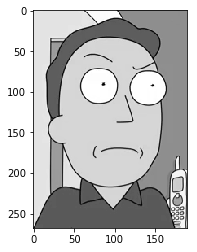

In [7]:
import numpy as np
from scipy import signal 
from scipy import misc 
import matplotlib.pyplot as plt
from PIL import Image

# Load image to notebook
raw = input("Enter path to an image: ")
im = Image.open(raw)

# Converts the image to black and white. 
image_gr = im.convert('L')
print("\n Original type: %r \n\n" % image_gr)

arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" % arr)

print("\nShape of array: " ,arr.shape)

#Activating matplotlib for Ipython
%matplotlib inline

#Plot image 
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray') # Different color maps include Greys, winter, autumn..
print("\nInput image converted to gray scale: \n")
plt.show(imgplot)


# Convolving two 2-dimension arrays

Next, we will demonstrate how to convolve an filter onto an existing image using the **scipy.signal.convolve2d()** method.

In [10]:


kernel = np.array([
                    [0,1,0],
                    [1,-4,1],
                    [0,1,0],
                            ])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


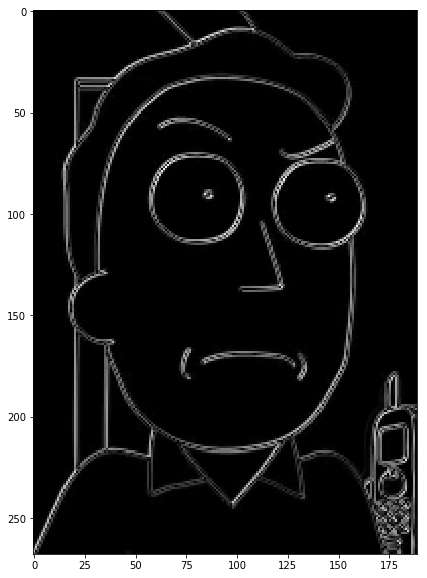

In [3]:
%matplotlib inline 
print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(grad), cmap='gray')

GRADIENT MAGNITUDE - Feature map


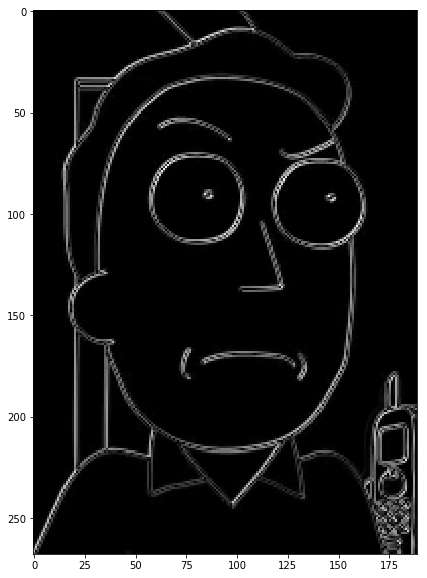

In [2]:
import numpy as np
from scipy import signal 
from scipy import misc 
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open("characters/jerry.png")
image_gr = im.convert('L')
arr = np.asarray(image_gr)

kernel = np.array([
                    [-2,-2,0],
                    [-2,6,0],
                    [0,0,0],
                            ])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

#Activating matplotlib for Ipython
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(grad), cmap='gray')


In [12]:
type(grad)

grad_biases = np.absolute(grad) + 100 

grad_biases[grad_biases > 255] = 255

GRADIENT MAGNITUDE - Feature map


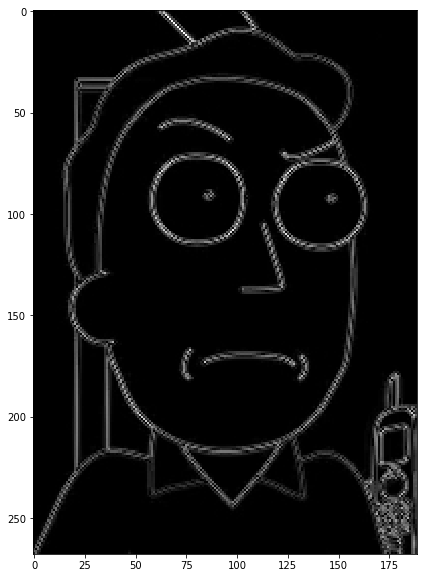

In [13]:
%matplotlib inline 
print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(grad), cmap='gray')

# Resizing using scipy (numpy array)

Reference: 
- https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imresize.html 


(300, 300, 3)


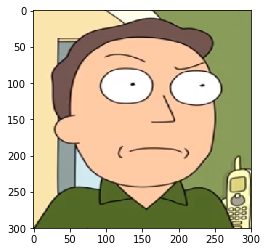

In [8]:
from scipy.misc import imresize
import tensorflow as tf 
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def read_image_and_resize(file, rescale_shape, scale_size, interp='nearest'):
    image = mpimg.imread(file)
    original_shape = image.shape
    resized_image = imresize(image, size=rescale_shape)
    
#     Set a rescale value
    return resized_image

result = read_image_and_resize("characters/jerry.png", [300,300],0.7)

print(result.shape)

plt.imshow(result)
plt.show()